# Transaction data


https://chain.so/

# BITCOIN EXTRACTION

In [ ]:
#####################
###### BITCOIN ######
#####################
#### EXTRACTION #####
#####################

# import packages
import requests
import tabulate
import pandas as pd
import networkx as nx
import numpy as np
import datetime
 

# 683093 - 683200: 11/05/2021 
 
# range block
block_range = list(range(683093, 683200)) # replace as needed
 
r1 = 0
r2 = 20
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://chain.so/api/v2/get_block/BTC/' + str(block_range[y])
 
  response = requests.get(link_block)
 
  if response.status_code == 200:
      # everything went swimmingly                                                                                                                   
      # parse the response as JSON
      content = response.json()
      
      # transaction id
      txs = content['data']['txs']

      # range
      r4 = len(txs)
      size = range(r3, r4)
 
  for x in size:
 
    # transaction link
    link_txs = 'https://chain.so/api/v2/tx/BTC/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
 
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])
 
          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
 
          # date
          date.append(content['data']['time'])
 
          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)
 
    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date
 
    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_bc_01 = pd.DataFrame({'transaction_id': transaction_id, 'from': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df_bc = df_bc_01[df_bc_01.to != "nulldata"]
df_bc.reset_index(drop=True, inplace=True)
 
 
 # fill NaN with previous data for all NaN, None
df_bc.date = df_bc.date.fillna(method = 'ffill')
df_bc = df_bc.fillna(value=np.nan)

# convert epoch time
for each in range(len(df_bc.date)):
  date_form.append(datetime.datetime.fromtimestamp(df_bc.date[each]).strftime('%c'))

# add date_form to df, drop old column and rename
df_bc['date_form'] = date_form
df_bc = df_bc.drop(columns = 'date')
df_bc = df_bc.rename(columns = {'date_form': 'date'}, inplace = False)

df_bc.to_csv("df_bc.csv") 
df_bc 

  # NOTE! We need to be aware of the following different transaction types:
  # Newly generated coins, identifiable via the participating address "coinbase!

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,transaction_id,from,tt_value,to,amount,date
0,5904733a3b5c0762d00fa931358b07af4c7d27272f5307...,coinbase,7.29566629,bc1qx9t2l3pyny2spqpqlye8svce70nppwtaxwdrp4,7.29566629,Tue May 11 11:02:40 2021
1,46fde81ba436974ff04118d178889f3e1e1949e1225566...,bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar,0.94516086,132azVxirjmW5nQqrUHGB1jVzogHv8aWmL,0.00123653,Tue May 11 11:02:40 2021
2,NaN,NaN,NaN,3MR6fT6GT34QPMMszKDi4ALAm8cyqy2xD3,0.00284063,Tue May 11 11:02:40 2021
3,NaN,NaN,NaN,1D2Gb8EATEqS8YcMxTyi5RR5ismqQHzBsK,0.00422860,Tue May 11 11:02:40 2021
4,NaN,NaN,NaN,3AN3E6jF439iBqeyBG7CkVVWZBR88wbdNR,0.02117593,Tue May 11 11:02:40 2021
...,...,...,...,...,...,...
195956,NaN,NaN,NaN,17HfWyNFBDrJgMigYrr67gKfYM2sRzN1K7,0.00003600,Tue May 11 13:25:43 2021
195957,90e89396be66bc2b68962946bb3e9e3954edecb3055330...,333DEeSUcpcPBXWjKkLdcxZr1XzhwZCquN,0.86345588,3NB1TnKzYFpiTdpt31rok7Hq4Lph9qpp6F,0.50000000,Tue May 11 13:25:43 2021
195958,NaN,NaN,NaN,3MCabht94FxzpJ8rynmN7WrzRVrSeqTmjs,0.36343908,Tue May 11 13:25:43 2021
195959,de118712af59c4936fea73f73b2ce9734148555c7981ad...,3NB1TnKzYFpiTdpt31rok7Hq4Lph9qpp6F,0.50000000,33LBDkMJnkai9rhtJe8k5stay5aarf4Xew,0.49998000,Tue May 11 13:25:43 2021


# BITCOIN INDICATORS OVER TIME

,amount,from,to,transaction_id,tt_value,vertices
date,,,,,,
Tue May 11 11:02:40 2021,10310,5477,10310,3192,5477,15787
Tue May 11 11:10:57 2021,7903,5960,7903,2671,5960,13863
Tue May 11 11:14:41 2021,7230,6168,7230,2322,6168,13398
Tue May 11 11:46:04 2021,18766,11653,18766,5826,11653,30419
Tue May 11 11:51:12 2021,3833,6893,3833,1564,6893,10726
Tue May 11 11:51:52 2021,5984,5656,5984,2233,5656,11640
Tue May 11 11:52:52 2021,7518,4523,7518,2073,4523,12041
Tue May 11 11:53:29 2021,1975,6424,1975,718,6424,8399
Tue May 11 12:09:14 2021,6071,5993,6071,1885,5993,12064


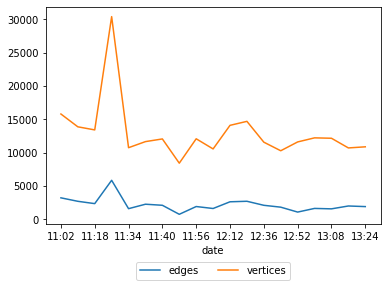

In [ ]:
#####################
###### BITCOIN ######
#####################
#### INDICATORS #####
#####################

import matplotlib.pyplot as plt

# summarizes df
df_bc_solution = df_bc.pivot_table(index=['date'], aggfunc='count')
# creates new var with vertices
df_bc_solution['vertices'] = df_bc_solution['to'] + df_bc_solution['from']
# consolidated edges and vertices data 
df_bc_egd_vert = pd.DataFrame({'edges': df_bc_solution.transaction_id, 'vertices': df_bc_solution.vertices})
# plot
plot_bc = df_bc_egd_vert.plot()
  # rename ticks  
plt.xticks(np.arange(0, 20, 2), ['11:02', '11:18', '11:34', '11:40', '11:56', '12:12', '12:36', '12:52', '13:08', '13:24']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
  # save
plt.savefig('bc_egdes_vertices.png', dpi = 300, transparent=True)
df_bc_solution

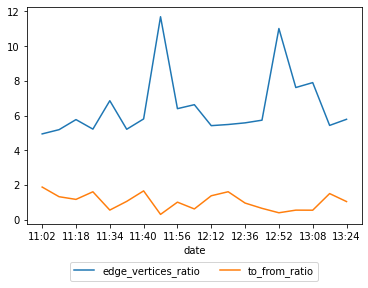

In [ ]:
#####################
###### BITCOIN ######
#####################
### INDICATORS II ###
#####################

# creates new col with edge to vert ratio
df_bc_solution['edge_vertices_ratio'] = df_bc_solution['vertices'] / df_bc_solution['transaction_id']
# creates new col with to from ratio
df_bc_solution['to_from_ratio'] = df_bc_solution['to'] / df_bc_solution['from']
# creates dataframe
df_bc_ratios = pd.DataFrame({'transaction_vertices_ratio': df_bc_solution.edge_vertices_ratio, 'to_from_ratio': df_bc_solution.to_from_ratio})
# plot
df_bc_ratios.plot()
  # rename ticks
plt.xticks(np.arange(0, 20, 2), ['11:02', '11:18', '11:34', '11:40', '11:56', '12:12', '12:36', '12:52', '13:08', '13:24']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
  # save
plt.savefig('ratios_bc.png', dpi = 300, transparent=True)

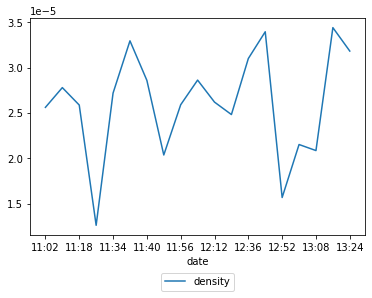

In [ ]:
#####################
###### BITCOIN ######
#####################
### INDICATORS III ##
#####################

# density
df_bc_solution['density'] = (2*df_bc_solution['transaction_id']) / (df_bc_solution['vertices']*(df_bc_solution['vertices']-1))
# plot
df_bc_solution.density.plot()
  # rename ticks
plt.xticks(np.arange(0, 20, 2), ['11:02', '11:18', '11:34', '11:40', '11:56', '12:12', '12:36', '12:52', '13:08', '13:24']) 
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
  # save
plt.savefig('density_bc.png', dpi = 300, transparent=True)

In [ ]:
#####################
###### BITCOIN ######
#####################
### INDICATORS IV ###
#####################

# consolidated data with ratios
df_bc_indicators = pd.DataFrame({'edges': df_bc_solution.transaction_id, 'vertices': df_bc_solution.vertices,
                              'edge_vertices_ratio': df_bc_solution.edge_vertices_ratio, 'to_from_ratio': df_bc_solution.to_from_ratio,
                              'density': df_bc_solution.density})

df_bc_indicators.to_csv("df_bc_indicators.csv") 
df_bc_indicators

,edges,vertices,edge_vertices_ratio,to_from_ratio,density
date,,,,,
Tue May 11 11:02:40 2021,3192,15787,4.945802,1.882417,0.000026
Tue May 11 11:10:57 2021,2671,13863,5.190191,1.326007,0.000028
Tue May 11 11:14:41 2021,2322,13398,5.770026,1.172179,0.000026
Tue May 11 11:46:04 2021,5826,30419,5.221250,1.610401,0.000013
Tue May 11 11:51:12 2021,1564,10726,6.858056,0.556071,0.000027
Tue May 11 11:51:52 2021,2233,11640,5.212718,1.057992,0.000033
Tue May 11 11:52:52 2021,2073,12041,5.808490,1.662171,0.000029
Tue May 11 11:53:29 2021,718,8399,11.697772,0.307441,0.000020
Tue May 11 12:09:14 2021,1885,12064,6.400000,1.013015,0.000026


# BTC EXTRACTION - NETWORKX

In [ ]:
#####################
###### BITCOIN ######
#####################
##### NETWORKX ######
#####################


# import packages
import requests
import tabulate
import pandas as pd
import networkx as nx
import numpy as np
import datetime
 
 
# 683093 - 683200: 11/05/2021 
 
# range block
block_range = list(range(683093, 683200)) # replace as needed
 
r1 = 0
r2 = 10
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://chain.so/api/v2/get_block/BTC/' + str(block_range[y])
 
  response = requests.get(link_block)
 
  if response.status_code == 200:
      # everything went swimmingly                                                                                                                   
      # parse the response as JSON
      content = response.json()
      
      # transaction id
      txs = content['data']['txs']

      # range
      r4 = len(txs)
      size = range(r3, r4)
 
  for x in size:
 
    # transaction link
    link_txs = 'https://chain.so/api/v2/tx/BTC/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
 
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])
 
          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
 
          # date
          date.append(content['data']['time'])
 
          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)

    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date
 
    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_bc_nx_01 = pd.DataFrame({'transaction_id': transaction_id, 'from_leg': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df_bc_nx = df_bc_nx_01[df_bc_nx_01.to != "nulldata"]
df_bc_nx.reset_index(drop=True, inplace=True)
 
 
 # fill NaN with previous data for all NaN, None
df_bc_nx.date = df_bc_nx.date.fillna(method = 'ffill')
df_bc_nx.from_leg = df_bc_nx.from_leg.fillna(method = 'ffill')
df_bc_nx.transaction_id = df_bc_nx.transaction_id.fillna(method = 'ffill')
df_bc_nx.tt_value = df_bc_nx.tt_value.fillna(method = 'ffill')
df_bc_nx = df_bc_nx.fillna(value=np.nan)

# convert epoch time
for each in range(len(df_bc_nx.date)):
  date_form.append(datetime.datetime.fromtimestamp(df_bc_nx.date[each]).strftime('%c'))

# add date_form to df, drop old column and rename
df_bc_nx['date_form'] = date_form
df_bc_nx = df_bc_nx.drop(columns = 'date')
df_bc_nx = df_bc_nx.rename(columns = {'date_form': 'date'}, inplace = False)

df_bc_nx.to_csv("df_bc_nx.csv") 
df_bc_nx

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,transaction_id,from_leg,tt_value,to,amount,date
0,5904733a3b5c0762d00fa931358b07af4c7d27272f5307...,coinbase,7.29566629,bc1qx9t2l3pyny2spqpqlye8svce70nppwtaxwdrp4,7.29566629,Tue May 11 11:02:40 2021
1,46fde81ba436974ff04118d178889f3e1e1949e1225566...,bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar,0.94516086,132azVxirjmW5nQqrUHGB1jVzogHv8aWmL,0.00123653,Tue May 11 11:02:40 2021
2,46fde81ba436974ff04118d178889f3e1e1949e1225566...,bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar,0.94516086,3MR6fT6GT34QPMMszKDi4ALAm8cyqy2xD3,0.00284063,Tue May 11 11:02:40 2021
3,46fde81ba436974ff04118d178889f3e1e1949e1225566...,bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar,0.94516086,1D2Gb8EATEqS8YcMxTyi5RR5ismqQHzBsK,0.00422860,Tue May 11 11:02:40 2021
4,46fde81ba436974ff04118d178889f3e1e1949e1225566...,bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar,0.94516086,3AN3E6jF439iBqeyBG7CkVVWZBR88wbdNR,0.02117593,Tue May 11 11:02:40 2021
...,...,...,...,...,...,...
230,ef7fc3af7c75ee4a3289577f4bb207632543ad9d1a569b...,3GmYvnC345CHPfJQ3w68mmkRWRw5VKxy14,20.57007792,1D4CgFY5fRBsNyMJaCPkD6Ev3RCCqe3cA1,0.00201600,Tue May 11 12:09:14 2021
231,5ef9554ca0c5a227bb5c7f09e24683bf2ec417794774e3...,3DVyDYT4o12jRQaUEamnyPhhn7ZWhJ5qmm,20.56738992,38Vy9HHEmdNuruYB9itgaNKvPMrH9q7C1J,0.00140000,Tue May 11 12:09:14 2021
232,5ef9554ca0c5a227bb5c7f09e24683bf2ec417794774e3...,3DVyDYT4o12jRQaUEamnyPhhn7ZWhJ5qmm,20.56738992,3BA1rdCWDnZnrZySJ7GVyprEd1x9wondw6,20.56532592,Tue May 11 12:09:14 2021
233,c99a56f1625446f58caf4474f833249385e817dd1be4bc...,39VgGLvtWE8FnTYHYoUxDHFWyWZntJ5KGe,0.01137949,1A8fjgbBz5etP8gLi2FNg6ggXiFbMQRwct,0.00202145,Tue May 11 12:09:14 2021


# BTC NETWORKX INDICATORS

In [ ]:
#####################
###### BITCOIN ######
#####################
##### NETWORKX ######
#####################

# Prep for NetworkX

# creates tuple list
d_bc = list(df_bc_nx.from_leg)
e_bc = list(df_bc_nx.to)
lst_tuple_bc = list(zip(d_bc, e_bc))

# create an empty graph
g_bc = nx.Graph()

# adds edges
g_bc.add_edges_from(lst_tuple_bc)

# plots
nx.draw_kamada_kawai(g_bc, with_labels=False)    

In [ ]:
#####################
###### BITCOIN ######
#####################
##### NETWORKX ######
#####################
### INDICATORS I ####
#####################

# Get information on the graph level

# Number of vertices
g_bc.number_of_nodes()
nodes_summary = nx.number_of_nodes(g_bc)

# Number of edges
g_bc.number_of_edges()
edges_summary = nx.number_of_edges(g_bc)

# Connectedness
  # A graph is connected if every node can be reached from any other node
connection_summary = nx.is_connected(g_bc)

# Density
density_summary = nx.density(g_bc)

# Transitivity
  # relating the number of triangles with the number of triples in the graph
transitivity_summary = nx.transitivity(g_bc)

# Clustering coefficient
clustering_summary = nx.average_clustering(g_bc)

# Average degree
  # average of all vertex degrees in the graph
avgdegree_summary = np.mean([i[1] for i in g_bc.degree()])

# summary table
summary_bc = pd.DataFrame({'Number of vertices': nodes_summary, 
                        'Number of edges': edges_summary, 
                        'Connectedness': connection_summary, 
                        'Density': density_summary, 
                        'Transitivity': transitivity_summary, 
                        'Clustering': clustering_summary,
                        'Average degree': avgdegree_summary}, index=[0])
summary_bc

,Number of vertices,Number of edges,Connectedness,Density,Transitivity,Clustering,Average degree
0,261,215,False,0.006337,0.007264,0.007769,1.64751


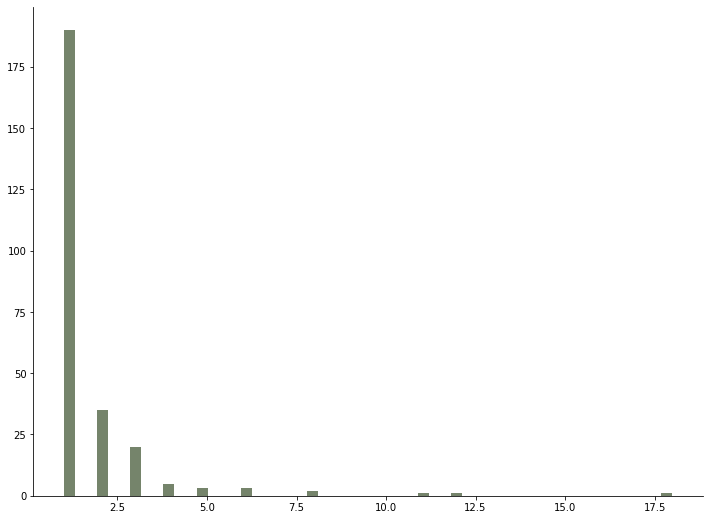

In [ ]:
#####################
###### BITCOIN ######
#####################
##### NETWORKX ######
#####################
### INDICATORS II ###
#####################

# Degree distribution
  #  degree of a node in a network is the number of connections it has to other 
  # nodes and the degree distribution is the probability distribution of these 
  # degrees over the whole network.
degs = [i[1] for i in g_bc.degree()]
fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left
ax.hist(degs, color="#75846b", bins='auto'); 
  # TRY IT OUT WITH 7!

plt.savefig('degree_dist_bc.png', dpi = 300, transparent=True)
  # only very few vertices with high degrees, and many with relatively small degrees 
  # -- a typical results for social networks. In such cases, we say that the degree 
  # distribution is heavy tailed.

In [ ]:
#####################
###### BITCOIN ######
#####################
##### NETWORKX ######
#####################
### INDICATORS III ##
#####################

# Betweeness Centrality
  # a vertex is important when it connects two large communities, which would 
  # remain unconnected if the vertex was not there.
  
between_centralities = nx.betweenness_centrality(g_bc).values()

fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left
ax.hist(between_centralities, color="#75846b", bins='auto');
  # TRY IT OUT WITH BINS = 7

plt.savefig('betweeness_bc.png', dpi = 300, transparent=True)

In [ ]:
#####################
###### BITCOIN ######
#####################
##### NETWORKX ######
#####################
### INDICATORS IV ###
#####################

# Get information on the vertex level

# Neighborhood
  # neighborhood of vertex  vi  is the set of all vertices that are adjacent to  vi
nx.all_neighbors(g_bc, "bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar")

# Connectedness
  # Two vertices are connected of there is a path between then
nx.has_path(g_bc, "bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar", "coinbase")

# Clustering coefficient
  # The clustering coefficient of a single vertex informs us about how well the 
  # neighbors of the vertex are themselves connected. The maximum amount of 
  # clustering is achieved if all neighbors of the vertex are neighbores as well
nx.clustering(g_bc, "bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar")

# Degree 
  # The degree of  vi  is just the number of adjacent vertices.
g_bc.degree("bc1qy5t8srull5qxahd8fxeek02jgufm7kl69pj9ar")

# DOGECOIN EXTRACTION

In [ ]:
#####################
###### DOGECOIN #####
#####################
#### EXTRACTION #####
#####################

import requests

# 3802040 - 3802147: 07/07/2021 
# range block
block_range = list(range(3802040, 3902147)) # replace as needed
 
r1 = 0
r2 = 10
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://sochain.com/api/v2/get_block/DOGE/' + str(block_range[y])
 
  response = requests.get(link_block)

  if response.status_code == 200:
      # everything went swimmingly
      # parse the response as JSON
      content = response.json()

      # transaction id
      txs = content['data']['txs']

      # range
      r4 = len(txs)
      size = range(r3, r4)

  for x in size:
 
    # transaction link
    link_txs = 'https://sochain.com/api/v2/tx/DOGE/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
  
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])

          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
  
          # date
          date.append(content['data']['time'])

          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)

    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date

    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_dc_01 = pd.DataFrame({'transaction_id': transaction_id, 'from': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df_dc= df_dc_01[df_dc_01.to != "nulldata"]
df_dc.reset_index(drop=True, inplace=True)
 
 
# fill NaN with previous data for all NaN, None
df_dc.date = df_dc.date.fillna(method = 'ffill')
df_dc = df_dc.fillna(value=np.nan)

# convert epoch time
for each in range(len(df_dc.date)):
  date_form.append(datetime.datetime.fromtimestamp(df_dc.date[each]).strftime('%c'))

# add date_form to df, drop old column and rename
df_dc['date_form'] = date_form
df_dc = df_dc.drop(columns = 'date')
df_dc = df_dc.rename(columns = {'date_form': 'date'}, inplace = False)

df_dc.to_csv("df_dc.csv") 
df_dc

,transaction_id,from,tt_value,to,amount,date
0,cd599031e9bb345da38055bfd311643a1c50642de6fec6...,coinbase,10026.15000000,DQvuJB3eHEUmdB2wi2K9B6Vdimq9DNJU7Z,10026.15000000,Wed Jul 7 05:05:25 2021
1,8dcbe3052ce153ec844dfaa7132e023678caa19dee65fb...,DN2GEaPpUyZS6GyuMf6ZkoJ9viAfAgwRwJ,44479.22000000,DTkNwRnWJgyZ3Puq9QwKVQLecrhn8C7CAP,44477.30000000,Wed Jul 7 05:05:25 2021
2,1006e2a267b3f5225c0791722ce7bd47098c9138ef003c...,DFAiZVrFhkFwVd8YiqxoiuQjrSdfM7W1KQ,45.59026418,DERZES1iRBsYUbeyhYXkSSDMFns3inkA9r,1.00200194,Wed Jul 7 05:05:25 2021
3,NaN,DKMxE68RTwVhMsaFnvGfqoh7FoBkZfFqw1,214.75991146,DPUELGczRSs9rrksdjhStjyJ7JpBSj5pL9,6410.00000000,Wed Jul 7 05:05:25 2021
4,NaN,DKMxE68RTwVhMsaFnvGfqoh7FoBkZfFqw1,228.32603189,NaN,NaN,Wed Jul 7 05:05:25 2021
...,...,...,...,...,...,...
239,55d113ca06e75819af56c003c4d40f7fb703fdcf637662...,DQ3yLUYJ5UZx66fSmbctqdX5KvjSXVMHiA,11.10253600,DGwjJyfWMcCf5txd8gAYu4AtCPEjnsaoT9,5.00000000,Wed Jul 7 05:10:08 2021
240,NaN,NaN,NaN,DQ3yLUYJ5UZx66fSmbctqdX5KvjSXVMHiA,5.10253600,Wed Jul 7 05:10:08 2021
241,8820326b2d93acaa0ba0b43c4bb015b0bddf6867bb1fb0...,coinbase,10002.98320000,D5gk59fVCVa6b4mmYGaVH7FLBCwxnFyqLj,10002.98320000,Wed Jul 7 05:10:17 2021
242,f4a3395cd7a978663056e5e379cd88ad5efe5068b2ae85...,DLPaeuaJi2JLUcvYHD4ddLxadwnGaVSt4p,38726.90755936,DRTSLDSRRDWWrMxRoWUqfWN5crXgoDDc8F,950.00000000,Wed Jul 7 05:10:17 2021


# DOGECOIN INDICATORS OVER TIME

,amount,from,to,transaction_id,tt_value,vertices
date,,,,,,
Wed Jul 7 05:05:25 2021,38,66,38,16,66,104
Wed Jul 7 05:05:52 2021,16,12,16,9,12,28
Wed Jul 7 05:06:14 2021,1,1,1,1,1,2
Wed Jul 7 05:06:28 2021,1,1,1,1,1,2
Wed Jul 7 05:07:08 2021,29,23,29,12,23,52
Wed Jul 7 05:07:56 2021,35,21,35,16,21,56
Wed Jul 7 05:08:23 2021,5,3,5,3,3,8
Wed Jul 7 05:08:48 2021,1,1,1,1,1,2
Wed Jul 7 05:10:08 2021,50,40,50,22,40,90


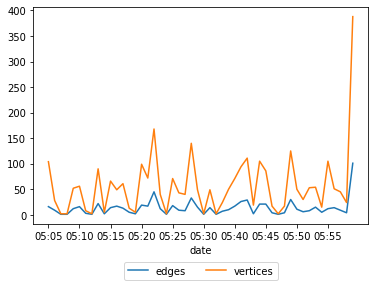

In [ ]:
#####################
###### DOGECOIN #####
#####################
#### INDICATORS #####
#####################

import matplotlib.pyplot as plt

# summarizes df
df_dc_solution = df_dc.pivot_table(index=['date'], aggfunc='count')
# creates new var with vertices
df_dc_solution['vertices'] = df_dc_solution['to'] + df_dc_solution['from']
# consolidated edges and vertices data 
df_dc_egd_vert = pd.DataFrame({'edges': df_dc_solution.transaction_id, 'vertices': df_dc_solution.vertices})
# plot
df_dc_egd_vert.plot()
  # rename ticks  
plt.xticks(np.arange(0, 50, 5), ['05:05', '05:10', '05:15', '05:20', '05:25', '05:30', '05:40', '05:45', '05:50', '05:55']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.savefig('egdes_vertices_dc.png', dpi = 300, transparent=True)
df_dc_solution

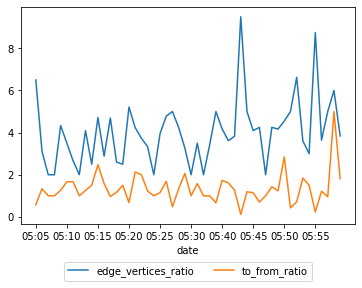

In [ ]:
#####################
###### DOGECOIN #####
#####################
### INDICATORS II ###
#####################

# creates new col with edge to vert ratio
df_dc_solution['edge_vertices_ratio'] = df_dc_solution['vertices'] / df_dc_solution['transaction_id']
# creates new col with to from ratio
df_dc_solution['to_from_ratio'] = df_dc_solution['to'] / df_dc_solution['from']
# creates dataframe
df_dc_ratios = pd.DataFrame({'edge_vertices_ratio': df_dc_solution.edge_vertices_ratio, 'to_from_ratio': df_dc_solution.to_from_ratio})
# plot
df_dc_ratios.plot()
  # rename ticks  
plt.xticks(np.arange(0, 50, 5), ['05:05', '05:10', '05:15', '05:20', '05:25', '05:30', '05:40', '05:45', '05:50', '05:55']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.savefig('ratios_dc.png', dpi = 300, transparent=True)

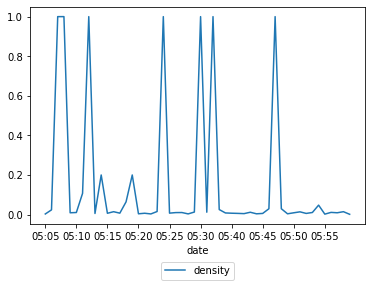

In [ ]:
#####################
###### DOGECOIN #####
#####################
## INDICATORS III ###
#####################

# density
df_dc_solution['density'] = (2*df_dc_solution['transaction_id']) / (df_dc_solution['vertices']*(df_dc_solution['vertices']-1))
# plot
df_dc_solution.density.plot()
  # rename ticks  
plt.xticks(np.arange(0, 50, 5), ['05:05', '05:10', '05:15', '05:20', '05:25', '05:30', '05:40', '05:45', '05:50', '05:55']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.savefig('density_dc.png', dpi = 300, transparent=True)

In [ ]:
#####################
###### DOGECOIN #####
#####################
### INDICATORS IV ###
#####################

# consolidated data with ratios
df_dc_indicators = pd.DataFrame({'edges': df_dc_solution.transaction_id, 'vertices': df_dc_solution.vertices,
                              'edge_vertices_ratio': df_dc_solution.edge_vertices_ratio, 'to_from_ratio': df_dc_solution.to_from_ratio,
                              'density': df_dc_solution.density})
df_dc_indicators

,edges,vertices,edge_vertices_ratio,to_from_ratio,density
date,,,,,
Wed Jul 7 05:05:25 2021,16,104,6.500000,0.575758,0.002987
Wed Jul 7 05:05:52 2021,9,28,3.111111,1.333333,0.023810
Wed Jul 7 05:06:14 2021,1,2,2.000000,1.000000,1.000000
Wed Jul 7 05:06:28 2021,1,2,2.000000,1.000000,1.000000
Wed Jul 7 05:07:08 2021,12,52,4.333333,1.260870,0.009050
Wed Jul 7 05:07:56 2021,16,56,3.500000,1.666667,0.010390
Wed Jul 7 05:08:23 2021,3,8,2.666667,1.666667,0.107143
Wed Jul 7 05:08:48 2021,1,2,2.000000,1.000000,1.000000
Wed Jul 7 05:10:08 2021,22,90,4.090909,1.250000,0.005493


# DOGECOIN EXTRACTION - NETWORKX

In [ ]:
#####################
###### DOGECOIN #####
#####################
##### NETWORKX ######
#####################

# import packages
import requests
import tabulate
import pandas as pd
import networkx as nx
import numpy as np
import datetime
 
 
# 3802140 - 3802147: 07/07/2021 
 
# range block
block_range = list(range(3802140, 3803147)) # replace as needed
 
r1 = 0
r2 = 10
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://chain.so/api/v2/get_block/DOGE/' + str(block_range[y])
 
  response = requests.get(link_block)
 
  if response.status_code == 200:
      # everything went swimmingly                                                                                                                   
      # parse the response as JSON
      content = response.json()
      
      # transaction id
      txs = content['data']['txs']

      # range
      r4 = len(txs)
      size = range(r3, r4)
 
  for x in size:
 
    # transaction link
    link_txs = 'https://sochain.com/api/v2/tx/DOGE/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
 
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])
 
          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
 
          # date
          date.append(content['data']['time'])
 
          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)

    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date
 
    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_dc_nx_01 = pd.DataFrame({'transaction_id': transaction_id, 'from_leg': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df_dc_nx= df_dc_nx_01[df_dc_nx_01.to != "nulldata"]
df_dc_nx.reset_index(drop=True, inplace=True)
 
 
 # fill NaN with previous data for all NaN, None
df_dc_nx.date = df_dc_nx.date.fillna(method = 'ffill')
df_dc_nx.from_leg = df_dc_nx.from_leg.fillna(method = 'ffill')
df_dc_nx.transaction_id = df_dc_nx.transaction_id.fillna(method = 'ffill')
df_dc_nx.tt_value = df_dc_nx.tt_value.fillna(method = 'ffill')
df_dc_nx = df_dc_nx.fillna(value=np.nan)

# convert epoch time
for each in range(len(df_dc_nx.date)):
  date_form.append(datetime.datetime.fromtimestamp(df_dc_nx.date[each]).strftime('%c'))

# add date_form to df, drop old column and rename
df_dc_nx['date_form'] = date_form
df_dc_nx = df_dc_nx.drop(columns = 'date')
df_dc_nx = df_dc_nx.rename(columns = {'date_form': 'date'}, inplace = False)

df_dc_nx.to_csv("df_dc_nx.csv") 
df_dc_nx

,transaction_id,from_leg,tt_value,to,amount,date
0,8ac00ecb8eb4093eca89ed5d5ff7d5278b7fc948b17e5f...,coinbase,10020.09818466,DL7PtcKycScxfBn34WgiRELGvR5FSuMD4t,10020.09818466,Wed Jul 7 06:47:56 2021
1,63762b983bca3c0d70fa6d1b6ad7047dbaffc3009fc74b...,DLCDJhnh6aGotar6b182jpzbNEyXb3C361,19131.74161126,DLXAXirdAtb7NNAu7xC9NhbzqhEbYkKp6t,1040.19141300,Wed Jul 7 06:47:56 2021
2,63762b983bca3c0d70fa6d1b6ad7047dbaffc3009fc74b...,DLCDJhnh6aGotar6b182jpzbNEyXb3C361,19131.74161126,DLCDJhnh6aGotar6b182jpzbNEyXb3C361,18089.55019826,Wed Jul 7 06:47:56 2021
3,aab2df8e355ead48da571e22f6943a88bdd124f8403160...,DGkTm3kPnVGBbwbg5jCffyqrFDqZnGiz7f,12318.84684978,D6viz2kusDhFe4Zqxotr19iGpEohJyf6A4,1300.00000000,Wed Jul 7 06:47:56 2021
4,aab2df8e355ead48da571e22f6943a88bdd124f8403160...,DGkTm3kPnVGBbwbg5jCffyqrFDqZnGiz7f,12318.84684978,DGkTm3kPnVGBbwbg5jCffyqrFDqZnGiz7f,11016.58684978,Wed Jul 7 06:47:56 2021
5,b6031ba0e1200c8bb0c26e6dc588746ea571c75f0e6db5...,DRWFxvQZhkabRN6iW582g1T46k5EFyWqEn,1523.00000000,DEKcuD5qV4tUoifjXyr5xCTWBsVCg1EErb,1998.30999662,Wed Jul 7 06:47:56 2021
6,b6031ba0e1200c8bb0c26e6dc588746ea571c75f0e6db5...,DRWFxvQZhkabRN6iW582g1T46k5EFyWqEn,477.00000000,NaN,NaN,Wed Jul 7 06:47:56 2021
7,8b0399d580a61a755bc63e46b8d4a5e89a47beb701d5d0...,D64G73v595vhHHR9b1L9KRHCYw4AbEEqjk,98.99992400,DPQcYynnuduPiYfYncD1iwTkb91mN9TKru,1.00000000,Wed Jul 7 06:47:56 2021
8,8b0399d580a61a755bc63e46b8d4a5e89a47beb701d5d0...,D64G73v595vhHHR9b1L9KRHCYw4AbEEqjk,98.99992400,DNhNShoubaTeUjWJhJSD1UYMYdNqmaZ83X,96.99874400,Wed Jul 7 06:47:56 2021
9,d143f81a621796f4d1bcc0bf9160691bd054c3825676a9...,DCVsYMBSGRTQ8NV1ziwouukDADwUrJbgnT,1.00000000,D78MAG4jjsPY52cqC9NUCFomST8s5jb2At,434.43000000,Wed Jul 7 06:47:56 2021


# DOGECOIN NETWORKX INDICATORS

In [ ]:
#####################
###### DOGECOIN #####
#####################
##### NETWORKX ######
#####################

# Prep for NetworkX

# creates tuple list
d_dc = list(df_dc_nx.from_leg)
e_dc = list(df_dc_nx.to)
# tuple
lst_tuple_dc = list(zip(d_dc, e_dc))

# create an empty graph
g_dc = nx.Graph()

# adds edges
g_dc.add_edges_from(lst_tuple_dc)

# plots
nx.draw_kamada_kawai(g_dc, with_labels=False)    

In [ ]:
#####################
###### DOGECOIN #####
#####################
##### NETWORKX ######
#####################
### INDICATORS I ####
#####################

# Get information on the graph level

# Number of vertices
g_dc.number_of_nodes()
nodes_summary = nx.number_of_nodes(g_dc)

# Number of edges
g_dc.number_of_edges()
edges_summary = nx.number_of_edges(g_dc)

# Connectedness
  # A graph is connected if every node can be reached from any other node
connection_summary = nx.is_connected(g_dc)

# Density
density_summary = nx.density(g_dc)

# Transitivity
  # relating the number of triangles with the number of triples in the graph
transitivity_summary = nx.transitivity(g_dc)

# Clustering coefficient
clustering_summary = nx.average_clustering(g_dc)

# Average degree
  # average of all vertex degrees in the graph
avgdegree_summary = np.mean([i[1] for i in g_dc.degree()])

# summary table
summary_dc = pd.DataFrame({'Number of vertices': nodes_summary, 
                        'Number of edges': edges_summary, 
                        'Connectedness': connection_summary, 
                        'Density': density_summary, 
                        'Transitivity': transitivity_summary, 
                        'Clustering': clustering_summary,
                        'Average degree': avgdegree_summary}, index=[0])
summary_dc

,Number of vertices,Number of edges,Connectedness,Density,Transitivity,Clustering,Average degree
0,37,27,False,0.040541,0,0.0,1.459459


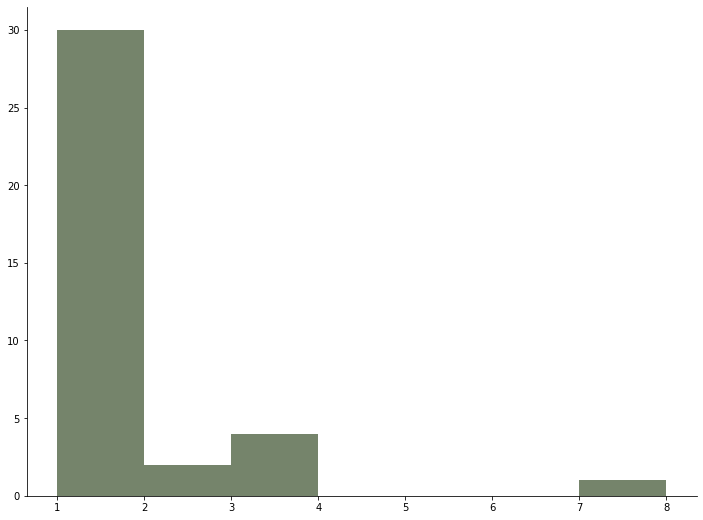

In [ ]:
#####################
###### DOGECOIN #####
#####################
##### NETWORKX ######
#####################
### INDICATORS II ###
#####################

# Degree distribution
  #  degree of a node in a network is the number of connections it has to other 
  # nodes and the degree distribution is the probability distribution of these 
  # degrees over the whole network.
degs = [i[1] for i in g_dc.degree()]
fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left
ax.hist(degs, color="#75846b", bins='auto');
# plt.xlim([0, 10])
plt.savefig('degree_dist_dc.png', dpi = 300, transparent=True)
  # only very few vertices with high degrees, and many with relatively small degrees 
  # -- a typical results for social networks. In such cases, we say that the degree 
  # distribution is heavy tailed.

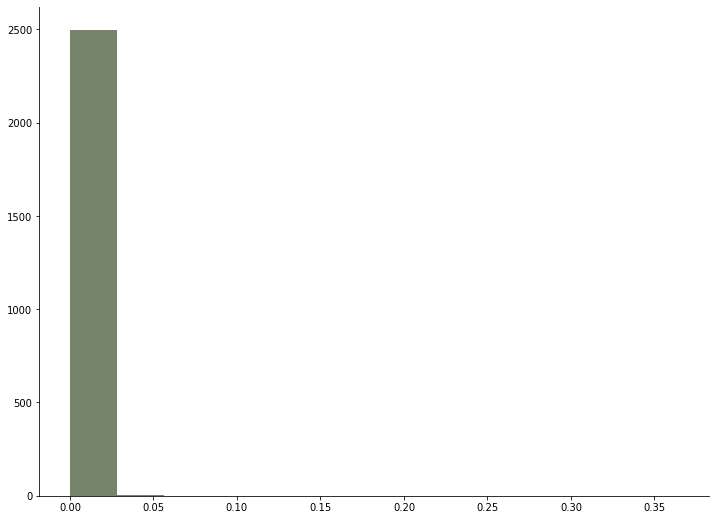

In [ ]:
#####################
###### DOGECOIN #####
#####################
##### NETWORKX ######
#####################
### INDICATORS III ##
#####################

# Betweeness Centrality
  # a vertex is important when it connects two large communities, which would 
  # remain unconnected if the vertex was not there.
  
between_centralities = nx.betweenness_centrality(g_dc).values()

fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left
ax.hist(between_centralities, color="#75846b", bins='auto');

plt.savefig('betweeness_dc.png', dpi = 300, transparent=True)

In [ ]:
#####################
###### DOGECOIN #####
#####################
##### NETWORKX ######
#####################
### INDICATORS IV ###
#####################

# Get information on the vertex level

# Neighborhood
  # neighborhood of vertex  vi  is the set of all vertices that are adjacent to  vi
nx.all_neighbors(g_dc, "DLCDJhnh6aGotar6b182jpzbNEyXb3C361")

# Connectedness
  # Two vertices are connected of there is a path between then
nx.has_path(g_dc, "DLCDJhnh6aGotar6b182jpzbNEyXb3C361", "coinbase")

# Clustering coefficient
  # The clustering coefficient of a single vertex informs us about how well the 
  # neighbors of the vertex are themselves connected. The maximum amount of 
  # clustering is achieved if all neighbors of the vertex are neighbores as well
nx.clustering(g_dc, "DLCDJhnh6aGotar6b182jpzbNEyXb3C361")

# Degree 
  # The degree of  vi  is just the number of adjacent vertices.
g_dc.degree("DLCDJhnh6aGotar6b182jpzbNEyXb3C361")

# LITECOIN EXTRACTION

In [ ]:
######################
###### LITECOIN ######
######################
##### EXTRACTION #####
######################

# import packages
import requests
import tabulate
import pandas as pd
import networkx as nx
import numpy as np
import datetime

# 2082158 - 2082265: 07/07/2021 
 
# range block
block_range = list(range(2082158, 2083265)) # replace as needed
 
r1 = 0
r2 = 20
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://sochain.com/api/v2/get_block/LTC/' + str(block_range[y])
 
  response = requests.get(link_block)

  if response.status_code == 200:
      # everything went swimmingly
      # parse the response as JSON
      content = response.json()

      # transaction id
      txs = content['data']['txs']

      # range
      r4 = len(txs)
      size = range(r3, r4)

  for x in size:
 
    # transaction link
    link_txs = 'https://sochain.com/api/v2/tx/LTC/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
  
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])

          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
  
          # date
          date.append(content['data']['time'])

          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)

    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date

    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_lc_01 = pd.DataFrame({'transaction_id': transaction_id, 'from': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df_lc= df_lc_01[df_lc_01.to != "nulldata"]
df_lc.reset_index(drop=True, inplace=True)
 
 
# fill NaN with previous data for all NaN, None
df_lc.date = df_lc.date.fillna(method = 'ffill')
df_lc = df_lc.fillna(value=np.nan)

# convert epoch time
for each in range(len(df_lc.date)):
  date_form.append(datetime.datetime.fromtimestamp(df_lc.date[each]).strftime('%c'))

# add date_form to df, drop old column and rename
df_lc['date_form'] = date_form
df_lc = df_lc.drop(columns = 'date')
df_lc = df_lc.rename(columns = {'date_form': 'date'}, inplace = False)

df_lc.to_csv("df_lc.csv") 
df_lc

# LITECOIN INDICATORS OVER TIME

,amount,from,to,transaction_id,tt_value,vertices
date,,,,,,
Wed Jul 7 04:52:02 2021,392,203,392,99,203,595
Wed Jul 7 04:54:10 2021,485,122,485,84,122,607
Wed Jul 7 04:55:15 2021,233,85,233,48,85,318
Wed Jul 7 04:58:26 2021,1734,521,1734,257,521,2255
Wed Jul 7 05:08:24 2021,2338,1075,2338,358,1075,3413
Wed Jul 7 05:10:05 2021,492,229,492,79,229,721
Wed Jul 7 05:11:01 2021,135,177,135,30,177,312
Wed Jul 7 05:14:11 2021,755,276,755,129,276,1031
Wed Jul 7 05:16:08 2021,499,423,499,93,423,922


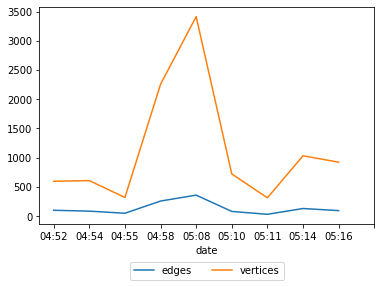

In [ ]:
#####################
###### LITECOIN #####
#####################
#### INDICATORS #####
#####################

import matplotlib.pyplot as plt

# summarizes df
df_lc_solution = df_lc.pivot_table(index=['date'], aggfunc='count')
# creates new var with vertices
df_lc_solution['vertices'] = df_lc_solution['to'] + df_lc_solution['from']
# consolidated edges and vertices data 
df_lc_egd_vert = pd.DataFrame({'edges': df_lc_solution.transaction_id, 'vertices': df_lc_solution.vertices})
# plot
df_lc_egd_vert.plot()
  # rename ticks  
plt.xticks(np.arange(0, 10, 1), ['04:52', '04:54', '04:55', '04:58', '05:08', '05:10', '05:11', '05:14', '05:16']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.savefig('egdes_vertices_lc.png', dpi = 300, transparent=True)
df_lc_solution

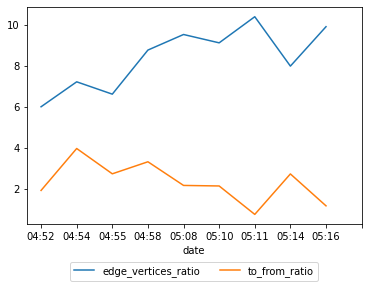

In [ ]:
#####################
###### LITECOIN #####
#####################
### INDICATORS II ###
#####################

# creates new col with edge to vert ratio
df_lc_solution['edge_vertices_ratio'] = df_lc_solution['vertices'] / df_lc_solution['transaction_id']
# creates new col with to from ratio
df_lc_solution['to_from_ratio'] = df_lc_solution['to'] / df_lc_solution['from']
# creates dataframe
df_lc_ratios = pd.DataFrame({'edge_vertices_ratio': df_lc_solution.edge_vertices_ratio, 'to_from_ratio': df_lc_solution.to_from_ratio})
# plot
df_lc_ratios.plot()
  # rename ticks  
plt.xticks(np.arange(0, 10, 1), ['04:52', '04:54', '04:55', '04:58', '05:08', '05:10', '05:11', '05:14', '05:16']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.savefig('ratios_lc.png', dpi = 300, transparent=True)

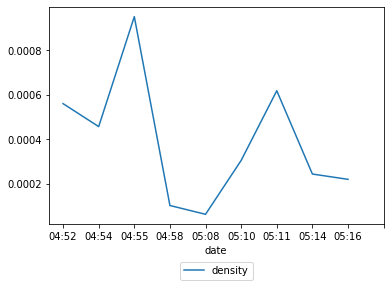

In [ ]:
#####################
###### LITECOIN #####
#####################
## INDICATORS III ###
#####################

# density
df_lc_solution['density'] = (2*df_lc_solution['transaction_id']) / (df_lc_solution['vertices']*(df_lc_solution['vertices']-1))
# plot
df_lc_solution.density.plot()
  # rename ticks  
plt.xticks(np.arange(0, 10, 1), ['04:52', '04:54', '04:55', '04:58', '05:08', '05:10', '05:11', '05:14', '05:16']) 
  # legend loc
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.savefig('density_lc.png', dpi = 300, transparent=True)

In [ ]:
#####################
###### LITECOIN #####
#####################
### INDICATORS IV ###
#####################

# consolidated data with ratios
df_lc_indicators = pd.DataFrame({'edges': df_lc_solution.transaction_id, 'vertices': df_lc_solution.vertices,
                              'edge_vertices_ratio': df_lc_solution.edge_vertices_ratio, 'to_from_ratio': df_lc_solution.to_from_ratio,
                              'density': df_lc_solution.density})
df_lc_indicators

,edges,vertices,edge_vertices_ratio,to_from_ratio,density
date,,,,,
Wed Jul 7 04:52:02 2021,99,595,6.010101,1.931034,0.000560
Wed Jul 7 04:54:10 2021,84,607,7.226190,3.975410,0.000457
Wed Jul 7 04:55:15 2021,48,318,6.625000,2.741176,0.000952
Wed Jul 7 04:58:26 2021,257,2255,8.774319,3.328215,0.000101
Wed Jul 7 05:08:24 2021,358,3413,9.533520,2.174884,0.000061
Wed Jul 7 05:10:05 2021,79,721,9.126582,2.148472,0.000304
Wed Jul 7 05:11:01 2021,30,312,10.400000,0.762712,0.000618
Wed Jul 7 05:14:11 2021,129,1031,7.992248,2.735507,0.000243
Wed Jul 7 05:16:08 2021,93,922,9.913978,1.179669,0.000219


# LITECOIN EXTRACTION - NETWORKX

In [ ]:
#####################
##### LITECOIN ######
#####################
##### NETWORKX ######
#####################

# import packages
import requests
import tabulate
import pandas as pd
import networkx as nx
import numpy as np
import datetime
 
 
# 2082258 - 2082265: 07/07/2021 
 
# range block
block_range = list(range(2082258, 2082365)) # replace as needed
 
r1 = 0
r2 = 10
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://chain.so/api/v2/get_block/LTC/' + str(block_range[y])
 
  response = requests.get(link_block)
 
  if response.status_code == 200:
      # everything went swimmingly                                                                                                                   
      # parse the response as JSON
      content = response.json()
      
      # transaction id
      txs = content['data']['txs']

      # range
      r4 = len(txs)
      size = range(r3, r4)
 
  for x in size:
 
    # transaction link
    link_txs = 'https://sochain.com/api/v2/tx/LTC/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
 
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])
 
          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
 
          # date
          date.append(content['data']['time'])
 
          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)

    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date
 
    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_lc_nx_01 = pd.DataFrame({'transaction_id': transaction_id, 'from_leg': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df_lc_nx = df_lc_nx_01[df_lc_nx_01.to != "nulldata"]
df_lc_nx.reset_index(drop=True, inplace=True)
 
 
 # fill NaN with previous data for all NaN, None
df_lc_nx.date = df_lc_nx.date.fillna(method = 'ffill')
df_lc_nx.from_leg = df_lc_nx.from_leg.fillna(method = 'ffill')
df_lc_nx.transaction_id = df_lc_nx.transaction_id.fillna(method = 'ffill')
df_lc_nx.tt_value = df_lc_nx.tt_value.fillna(method = 'ffill')
df_lc_nx = df_lc_nx.fillna(value=np.nan)

# convert epoch time
for each in range(len(df_lc_nx.date)):
  date_form.append(datetime.datetime.fromtimestamp(df_lc_nx.date[each]).strftime('%c'))

# add date_form to df, drop old column and rename
df_lc_nx['date_form'] = date_form
df_lc_nx = df_lc_nx.drop(columns = 'date')
df_lc_nx = df_lc_nx.rename(columns = {'date_form': 'date'}, inplace = False)

df_lc_nx.to_csv("df_lc_nx.csv") 
df_lc_nx

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,transaction_id,from_leg,tt_value,to,amount,date
0,c7b57b498aebfe0e106685428f457de793d87cbccdbe22...,coinbase,12.56826642,LajyQBeZaBA1NkZDeY8YT5RYYVRkXMvb2T,12.56826642,Wed Jul 7 09:31:24 2021
1,1380fa7fd8433dbadafb321092becb3b47680d43adbcf2...,LPFRDzav62oG91b5mHKj9k3g4tjtn5Vjtp,1.43999580,LUqSZcT8M9br5MggekV6LC2Vphf4wSbCsC,0.17980000,Wed Jul 7 09:31:24 2021
2,1380fa7fd8433dbadafb321092becb3b47680d43adbcf2...,LPFRDzav62oG91b5mHKj9k3g4tjtn5Vjtp,1.43999580,LPFRDzav62oG91b5mHKj9k3g4tjtn5Vjtp,1.25843300,Wed Jul 7 09:31:24 2021
3,ca6638fbf422a5914602067cb7d48dd8aff28fa2bf8afe...,35Jd3RFpfNun8A2ah2n5Vx8wrNoadM4VqV,107.33377450,3G1SnisdmLxdLa9hzp8YUhgB42eEMPbKTk,107.20077450,Wed Jul 7 09:31:24 2021
4,ca6638fbf422a5914602067cb7d48dd8aff28fa2bf8afe...,35Jd3RFpfNun8A2ah2n5Vx8wrNoadM4VqV,107.33377450,35vsSgH4b387meBCtzXJwfBcxZQNJsUWAy,0.13200000,Wed Jul 7 09:31:24 2021
...,...,...,...,...,...,...
16942,db8d527183eee2c8feb4c2ae296d1182371a156cbc5805...,ltc1qk8gvhhfj587m37lu4melpaakqx4p3dextzmtty,0.01666318,ltc1q43q5wrrhtvp60rqllz7fcy0tfy36xpq2fw42jm,0.10611481,Wed Jul 7 10:07:30 2021
16943,db8d527183eee2c8feb4c2ae296d1182371a156cbc5805...,ltc1qauelsfavem6hnw5u5ruexwdacm32v3h9cjz9s2,0.11294656,ltc1qglylyudhn9qyt9lnrzfh0nywm2lkqc63tyjuez,0.02349283,Wed Jul 7 10:07:30 2021
16944,596da855a0dc699ce1d933694037ddff162bd6bfc64360...,ltc1q06a8ypzlmt3gtssfm2a5rsfmjvlcrwfayaffjd,0.04100000,3HfrQb8612M7YzaJJQAaUKAbZnxTCNamEY,0.04099889,Wed Jul 7 10:07:30 2021
16945,61873cb32f84b54a5f2773b7d8bfffb5d483da0909ada6...,3N8XxWP77XiYFNsP6zJBxdZHvyWLybeF29,0.12022000,ltc1qdv4pkr6c6f96xka7wswp3c4hc9fl2splprlav7,0.10609518,Wed Jul 7 10:07:30 2021


# LITECOIN NETWORKX INDICATORS

In [ ]:
#####################
##### LITECOIN ######
#####################
##### NETWORKX ######
#####################

# creates tuple list
d_lc = list(df_lc_nx.from_leg)
e_lc = list(df_lc_nx.to)
# tuple
lst_tuple_lc = list(zip(d_lc,e_lc))

# create an empty graph
g_lc = nx.Graph()

# adds edges
g_lc.add_edges_from(lst_tuple_lc)

# plots
nx.draw_kamada_kawai(g_lc, with_labels=False)    

In [ ]:
#####################
##### LITECOIN ######
#####################
##### NETWORKX ######
#####################
### INIDICATORS I ###
#####################

# Get information on the graph level

# Number of vertices
g_lc.number_of_nodes()
nodes_summary = nx.number_of_nodes(g_lc)

# Number of edges
g.number_of_edges()
edges_summary = nx.number_of_edges(g_lc)

# Connectedness
  # A graph is connected if every node can be reached from any other node
connection_summary = nx.is_connected(g_lc)

# Density
density_summary = nx.density(g_lc)

# Transitivity
  # relating the number of triangles with the number of triples in the graph
transitivity_summary = nx.transitivity(g_lc)

# Clustering coefficient
clustering_summary = nx.average_clustering(g_lc)

# Average degree
  # average of all vertex degrees in the graph
avgdegree_summary = np.mean([i[1] for i in g_lc.degree()])

# summary table
summary_lc = pd.DataFrame({'Number of vertices': nodes_summary, 
                        'Number of edges': edges_summary, 
                        'Connectedness': connection_summary, 
                        'Density': density_summary, 
                        'Transitivity': transitivity_summary, 
                        'Clustering': clustering_summary,
                        'Average degree': avgdegree_summary}, index=[0])
summary_lc

,Number of vertices,Number of edges,Connectedness,Density,Transitivity,Clustering,Average degree
0,14186,13992,False,0.000139,0.000028,0.003058,1.972649


In [ ]:
#####################
##### LITECOIN ######
#####################
##### NETWORKX ######
#####################
## INIDICATORS II ###
#####################

# Degree distribution
  #  degree of a node in a network is the number of connections it has to other 
  # nodes and the degree distribution is the probability distribution of these 
  # degrees over the whole network.
degs = [i[1] for i in g_lc.degree()]
fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left
ax.hist(degs, color="#75846b", bins='auto');

plt.savefig('degree_dist_lc.png', dpi = 300, transparent=True)
  # only very few vertices with high degrees, and many with relatively small degrees 
  # -- a typical results for social networks. In such cases, we say that the degree 
  # distribution is heavy tailed.

In [ ]:
#####################
##### LITECOIN ######
#####################
##### NETWORKX ######
#####################
## INIDICATORS III ##
#####################

# Betweeness Centrality
  # a vertex is important when it connects two large communities, which would 
  # remain unconnected if the vertex was not there.
  
between_centralities = nx.betweenness_centrality(g_lc).values()

fig, ax = plt.subplots(figsize=(12, 9))
ax.spines["top"].set_visible(False) # Remove plot frame line on the top 
ax.spines["right"].set_visible(False) # Remove plot frame line on the right
ax.get_xaxis().tick_bottom()  # Remove ticks on the bottom
ax.get_yaxis().tick_left()  # Remove the ticks on the left
ax.hist(between_centralities, color="#75846b", bins='auto');

plt.savefig('betweeness_lc.png', dpi = 300, transparent=True)

In [ ]:
#####################
##### LITECOIN ######
#####################
##### NETWORKX ######
#####################
## INIDICATORS IV ###
#####################

# Get information on the vertex level

# Neighborhood
  # neighborhood of vertex  vi  is the set of all vertices that are adjacent to  vi
nx.all_neighbors(g_lc, "LPFRDzav62oG91b5mHKj9k3g4tjtn5Vjtp")

# Connectedness
  # Two vertices are connected of there is a path between then
nx.has_path(g_lc, "LPFRDzav62oG91b5mHKj9k3g4tjtn5Vjtp", "coinbase")

# Clustering coefficient
  # The clustering coefficient of a single vertex informs us about how well the 
  # neighbors of the vertex are themselves connected. The maximum amount of 
  # clustering is achieved if all neighbors of the vertex are neighbores as well
nx.clustering(g_lc, "LPFRDzav62oG91b5mHKj9k3g4tjtn5Vjtp")

# Degree 
  # The degree of  vi  is just the number of adjacent vertices.
g_lc.degree("LPFRDzav62oG91b5mHKj9k3g4tjtn5Vjtp")

# BITCOIN EXTRACTION - TEMPORAL COMMUNITY

In [ ]:
#####################
###### BITCOIN ######
#####################
#### EXTRACTION #####
#####################
#### COMM FORMAT ####
#####################

# import packages
import requests
import tabulate
import pandas as pd
import networkx as nx
import numpy as np
import datetime
 
 
# 682950 - 683238: 11/05/2021 
 
# range block
block_range = list(range(683093, 683700))
 
r1 = 0
r2 = 10
size_block = range(r1, r2)
 
# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://chain.so/api/v2/get_block/BTC/' + str(block_range[y])
 
  response = requests.get(link_block)
 
  if response.status_code == 200:
      # everything went swimmingly                                                                                                                   
      # parse the response as JSON
      content = response.json()
      
      # transaction id
      txs = content['data']['txs']

      # range
      r4 = len(txs)
      size = range(r3, r4)
 
  for x in size:
 
    # transaction link
    link_txs = 'https://chain.so/api/v2/tx/BTC/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
 
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])
 
          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
 
          # date
          date.append(content['data']['time'])
 
          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)

    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date
 
    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_bc_cm_01 = pd.DataFrame({'transaction_id': transaction_id, 'from_leg': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df_bc_cm = df_bc_cm_01[df_bc_cm_01.to != "nulldata"]
df_bc_cm.reset_index(drop=True, inplace=True)
 
 # fill NaN with previous data for all NaN, None
df_bc_cm.date = df_bc_cm.date.fillna(method = 'ffill')
df_bc_cm.from_leg = df_bc_cm.from_leg.fillna(method = 'ffill')
df_bc_cm.transaction_id = df_bc_cm.transaction_id.fillna(method = 'ffill')
df_bc_cm.tt_value = df_bc_cm.tt_value.fillna(method = 'ffill')
df_bc_cm = df_bc_cm.fillna(value=np.nan)


# rename columns to keep
df_bc_cm = df_bc_cm.rename(columns = {'from_leg': 'from_id'}, inplace = False)
df_bc_cm = df_bc_cm.rename(columns = {'to': 'to_id'}, inplace = False)
df_bc_cm = df_bc_cm.rename(columns = {'date': 'timestamps'}, inplace = False)

# drop unecessary columns
df_bc_cm = df_bc_cm.drop(columns = 'transaction_id')
df_bc_cm = df_bc_cm.drop(columns = 'tt_value')
df_bc_cm = df_bc_cm.drop(columns = 'amount')
df_bc_cm = df_bc_cm.dropna()


# dictionary for convertion to int

# to_id
from_id_no_dups_bc = set(df_bc_cm.from_id) 
from_id_no_dups_bc.update(set(df_bc_cm.to_id))
no_dupes_bc = list(from_id_no_dups_bc)
k1 = 0 #range
k2 = len(no_dupes_bc) #range
key_bc = list(range(k1, k2)) # creates key id
df_bc_to = pd.DataFrame({'to_id': no_dupes_bc, 'factor_to': key_bc}) # as dataframe

# from_id
from_id_no_dupes_bc = set(df_bc_cm.from_id) 
from_id_no_dupes_bc.update(set(df_bc_cm.to_id))
no_dupes_bc = list(from_id_no_dupes_bc)
k1 = 0 #range
k2 = len(no_dupes_bc) #range
key_bc = list(range(k1, k2)) # creates key id
df_bc_from = pd.DataFrame({'from_id': no_dupes_bc, 'factor_to': key_bc}) # as dataframe

# merges dfs
f1_bc_df = pd.merge(df_bc_cm, df_bc_from, on = 'from_id', how ='left')
full_bc_df = pd.merge(f1_bc_df, df_bc_to, on = 'to_id', how ='left')

# drop columns and rename to keep
full_bc_df = full_bc_df.drop(columns= 'from_id')
full_bc_df = full_bc_df.drop(columns= 'to_id')
full_bc_df = full_bc_df.rename(columns = {'factor_to_x': 'from_id'}, inplace = False)
full_bc_df = full_bc_df.rename(columns = {'factor_to_y': 'to_id'}, inplace = False)

# factorise timestamps
full_bc_df['timestamps'] = pd.factorize(full_bc_df.timestamps)[0]

# as int
full_bc_df = full_bc_df.astype(int)

# re order
full_bc_df = full_bc_df[['from_id','to_id','timestamps']]

# save
full_bc_df.to_csv("full_bc_df.csv", sep='\t', header=False)  
full_bc_df


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,from_id,to_id,timestamps
0,107,230,0
1,67,141,0
2,67,24,0
3,67,17,0
4,67,99,0
...,...,...,...
213,135,70,9
214,119,131,9
215,119,163,9
216,122,63,9


# BITCOIN STABLE COMMUNITY

In [ ]:
#####################
###### BITCOIN ######
#####################
#### STABLE COM #####
#####################

# mounts drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# https://github.com/VeryLargeGraph/TSCAN
# runs run.py - TSCAN
!python3 "/content/drive/My Drive/Colab Notebooks/run.py"

Dataset name(str): full_bc_df.csv
Epsilon(float): 0.5
Tau(int): 1
Miu(int): 1
Type one number to chose the algorithm: [1]TSCANB; [2]TSACNS; [3]TSCANA. (int): 1
227
218
temporal edges:218.0
Runing time of SCANB:0.02752
Cores output at: full_bc_df.csv.output-0.5-1-1_SCANB


In [ ]:
# prints stable communities - STATIC ONES
stable_bc_01 = pd.DataFrame(data=open('/content/full_bc_df_output_05_1_1_SCANB'))
stable_bc_01

,0
0,"[61, 237, 6, 7, 8, 9, 201, 202, 203, 62, 159, ..."
1,"[129, 10, 11, 231, 206, 207, 130]\n"
2,"[122, 22, 23, 107, 0, 24, 42, 63, 89, 19, 111,..."
3,"[68, 229, 208, 209, 69, 102]\n"
4,"[29, 228, 77, 78, 79, 80, 81, 82, 194, 195, 19..."
5,"[41, 171, 138, 90, 91, 158, 47, 48, 46, 12, 13..."
6,"[152, 103, 239, 153]\n"
7,"[115, 104, 14, 114, 57, 58, 15, 238, 149, 150]\n"
8,"[105, 240]\n"


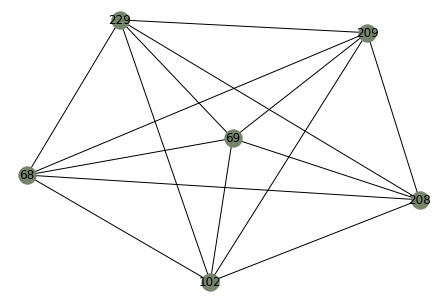

In [ ]:
# Represent Stable Community

import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
  
g = nx.Graph()

# [46, 1086, 1600, 1601, 47]\n 
# [2257, 2530, 2531, 2551, 2553]\n
#[68, 229, 208, 209, 69, 102]\n
g.add_node(68)
g.add_node(229)
g.add_node(208)
g.add_node(209)
g.add_node(69)
g.add_node(102)

g.add_edge(68, 229)
g.add_edge(68, 208)
g.add_edge(68, 209)
g.add_edge(68, 69)
g.add_edge(68, 102)

g.add_edge(229, 68)
g.add_edge(229, 208)
g.add_edge(229, 209)
g.add_edge(229, 69)
g.add_edge(229, 102)


g.add_edge(208, 68)
g.add_edge(208, 229)
g.add_edge(208, 209)
g.add_edge(208, 69)
g.add_edge(208, 102)

g.add_edge(209, 68)
g.add_edge(209, 229)
g.add_edge(209, 208)
g.add_edge(209, 69)
g.add_edge(209, 102)

g.add_edge(69, 68)
g.add_edge(69, 229)
g.add_edge(69, 208)
g.add_edge(69, 209)
g.add_edge(69, 102)

# drawing in spring layout
nx.draw_spring(g, with_labels = True, node_color="#75846b")
plt.savefig("stable_bc.png", transparent = True, dpi = 300)

# BITCOIN TEMPORAL LOUVAIN

In [ ]:
#####################
###### BITCOIN ######
#####################
#### TEMP MEAS ######
#####################

# imports teneto
!pip install teneto
import teneto
from teneto import TemporalNetwork

# define tnet
df_bc_tnet = full_bc_df

# rename columns to keep
df_bc_tnet = df_bc_tnet.rename(columns = {'from_id': 'i'}, inplace = False)
df_bc_tnet = df_bc_tnet.rename(columns = {'to_id': 'j'}, inplace = False)
df_bc_tnet = df_bc_tnet.rename(columns = {'timestamps': 't'}, inplace = False)

tnet_bc = TemporalNetwork(from_df=df_bc_tnet)
tnet_bc.network

# temporal louvain
temporal_louv_bc = teneto.communitydetection.temporal_louvain(tnet_bc)

# as dataframe
temp_louv_bc = pd.DataFrame(temporal_louv_bc)
temp_louv_bc.to_csv("temp_louv_dc.csv")
temp_louv_bc

0


/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['i'] = self.network['i'].astype(int)
/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['j'] = self.network['j'].astype(int)


         i     j  weight
0        0     3       1
1      252   255       1
2      504   507       1
3      756   759       1
4     1008  1011       1
...    ...   ...     ...
6425  2263  2515       0
6426  2264  2516       0
6427  2265  2517       0
6428  2266  2518       0
6429  2267  2519       0

[6430 rows x 3 columns]
1


/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['i'] = self.network['i'].astype(int)
/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['j'] = self.network['j'].astype(int)


         i     j  weight
0        0     3       1
1      252   255       1
2      504   507       1
3      756   759       1
4     1008  1011       1
...    ...   ...     ...
6425  2263  2515       0
6426  2264  2516       0
6427  2265  2517       0
6428  2266  2518       0
6429  2267  2519       0

[6430 rows x 3 columns]


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,9.0,9.0,9.0,9.0,9.0,32.0,32.0,32.0,15.0,15.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
...,...,...,...,...,...,...,...,...,...,...
247,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0
248,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
249,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
250,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0


In [ ]:
# score for stable community
temp_louv_bc['same_0'] = np.where( temp_louv_bc[0] == temp_louv_bc[1], 1, 0)
temp_louv_bc['same_1'] = np.where( temp_louv_bc[1] == temp_louv_bc[2], 1, 0)
temp_louv_bc['same_2'] = np.where( temp_louv_bc[2] == temp_louv_bc[3], 1, 0)
temp_louv_bc['same_3'] = np.where( temp_louv_bc[3] == temp_louv_bc[4], 1, 0)
temp_louv_bc['same_4'] = np.where( temp_louv_bc[4] == temp_louv_bc[5], 1, 0)
temp_louv_bc['same_5'] = np.where( temp_louv_bc[5] == temp_louv_bc[6], 1, 0)
temp_louv_bc['same_6'] = np.where( temp_louv_bc[6] == temp_louv_bc[7], 1, 0)
temp_louv_bc['same_7'] = np.where( temp_louv_bc[7] == temp_louv_bc[8], 1, 0)
temp_louv_bc['same_8'] = np.where( temp_louv_bc[8] == temp_louv_bc[9], 1, 0)
temp_louv_bc['score']=temp_louv_bc['same_0']+temp_louv_bc['same_1']+temp_louv_bc['same_2']+temp_louv_bc['same_3']+temp_louv_bc['same_4']+temp_louv_bc['same_5']+temp_louv_bc['same_6']+temp_louv_bc['same_7']+temp_louv_bc['same_8']
temp_louv_bc['stable'] = np.where( temp_louv_bc['score'] == 9, 1, 0)

# as int
temp_louv_bc = temp_louv_bc.astype(int)
summary_temp_louv_bc = temp_louv_bc

# summarizes df
summary_temp_louv_bc = summary_temp_louv_bc.drop(columns = 'same_0')
summary_temp_louv_bc = summary_temp_louv_bc.drop(columns = 'same_1')
summary_temp_louv_bc = summary_temp_louv_bc.drop(columns = 'same_2')
summary_temp_louv_bc = summary_temp_louv_bc.drop(columns = 'same_3')
summary_temp_louv_bc = summary_temp_louv_bc.drop(columns = 'same_4')
summary_temp_louv_bc = summary_temp_louv_bc.drop(columns = 'same_5')
summary_temp_louv_bc = summary_temp_louv_bc.drop(columns = 'same_6')
summary_temp_louv_bc = summary_temp_louv_bc.drop(columns = 'same_7')
summary_temp_louv_bc = summary_temp_louv_bc.drop(columns = 'same_8')
summary_temp_louv_bc = summary_temp_louv_bc.drop(columns = 'score')
# summary_temp_louv_bc = summary_temp_louv_bc.drop(columns = 'same')

# number of stable communities
summary_temp_louv_bc
summary_temp_louv_bc.max()

0         71
1         71
2         71
3         71
4         71
5         71
6         71
7         71
8         71
9         71
stable     1
dtype: int64

# DOGECOIN EXTRACTION - TEMPORAL COMMUNITY

In [ ]:
#####################
###### DOGECOIN #####
#####################
#### EXTRACTION #####
#####################
#### COMM FORMAT ####
#####################

# import packages
import requests
import tabulate
import pandas as pd
import networkx as nx
import numpy as np
import datetime
 
 
# 3802140 - 3802147: 07/07/2021 
 
# range block
block_range = list(range(3802140, 3803147)) # replace as needed
 
r1 = 0
r2 = 10
size_block = range(r1, r2)

# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://chain.so/api/v2/get_block/DOGE/' + str(block_range[y])
 
  response = requests.get(link_block)
 
  if response.status_code == 200:
      # everything went swimmingly                                                                                                                   
      # parse the response as JSON
      content = response.json()
      
      # transaction id
      txs = content['data']['txs']

      # range
      r4 = len(txs)
      size = range(r3, r4)
 
  for x in size:
 
    # transaction link
    link_txs = 'https://chain.so/api/v2/tx/DOGE/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
 
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])
 
          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
 
          # date
          date.append(content['data']['time'])
 
          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)

    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date
 
    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_dc_cm_01 = pd.DataFrame({'transaction_id': transaction_id, 'from_leg': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df_dc_cm = df_dc_cm_01[df_dc_cm_01.to != "nulldata"]
df_dc_cm.reset_index(drop=True, inplace=True)
 
 # fill NaN with previous data for all NaN, None
df_dc_cm.date = df_dc_cm.date.fillna(method = 'ffill')
df_dc_cm.from_leg = df_dc_cm.from_leg.fillna(method = 'ffill')
df_dc_cm.transaction_id = df_dc_cm.transaction_id.fillna(method = 'ffill')
df_dc_cm.tt_value = df_dc_cm.tt_value.fillna(method = 'ffill')
df_dc_cm = df_dc_cm.fillna(value=np.nan)


# rename columns to keep
df_dc_cm = df_dc_cm.rename(columns = {'from_leg': 'from_id'}, inplace = False)
df_dc_cm = df_dc_cm.rename(columns = {'to': 'to_id'}, inplace = False)
df_dc_cm = df_dc_cm.rename(columns = {'date': 'timestamps'}, inplace = False)

# drop unecessary columns
df_dc_cm = df_dc_cm.drop(columns = 'transaction_id')
df_dc_cm = df_dc_cm.drop(columns = 'tt_value')
df_dc_cm = df_dc_cm.drop(columns = 'amount')
df_dc_cm = df_dc_cm.dropna()


# dictionary for convertion to int

# to_id
from_id_no_dups_dc = set(df_dc_cm.from_id) 
from_id_no_dups_dc.update(set(df_dc_cm.to_id))
no_dupes_dc = list(from_id_no_dups_dc)
k1 = 0 #range
k2 = len(no_dupes_dc) #range
key_dc = list(range(k1, k2)) # creates key id
df_dc_to = pd.DataFrame({'to_id': no_dupes_dc, 'factor_to': key_dc}) # as dataframe

# from_id
from_id_no_dups_dc = set(df_dc_cm.from_id) 
from_id_no_dups_dc.update(set(df_dc_cm.to_id))
no_dupes_dc = list(from_id_no_dups_dc)
k1 = 0 #range
k2 = len(no_dupes_dc) #range
key_dc = list(range(k1, k2)) # creates key id
df_dc_from = pd.DataFrame({'from_id': no_dupes_dc, 'factor_to': key_dc}) # as dataframe

# merges dfs
f1_dc_df = pd.merge(df_dc_cm, df_dc_from, on = 'from_id', how ='left')
full_dc_df = pd.merge(f1_dc_df, df_dc_to, on = 'to_id', how ='left')

# drop columns and rename to keep
full_dc_df = full_dc_df.drop(columns= 'from_id')
full_dc_df = full_dc_df.drop(columns= 'to_id')
full_dc_df = full_dc_df.rename(columns = {'factor_to_x': 'from_id'}, inplace = False)
full_dc_df = full_dc_df.rename(columns = {'factor_to_y': 'to_id'}, inplace = False)

# factorise timestamps
full_dc_df['timestamps'] = pd.factorize(full_dc_df.timestamps)[0]

# as int
full_dc_df = full_dc_df.astype(int)

# re order
full_dc_df = full_dc_df[['from_id','to_id','timestamps']]

# save
full_dc_df.to_csv("full_dc_df.csv", sep='\t', header=False)  
full_dc_df


,from_id,to_id,timestamps
0,345,298,0
1,363,70,0
2,363,363,0
3,198,130,0
4,198,198,0
...,...,...,...
432,330,488,8
433,330,330,8
434,418,179,8
435,418,418,8


# DOGECOIN TEMPORAL LOUVAIN

In [ ]:
#####################
###### DOGECOIN #####
#####################
#### TEMP MEAS ######
#####################

# imports teneto
!pip install teneto
import teneto
from teneto import TemporalNetwork

# define tnet
df_dc_tnet = full_dc_df

# rename columns to keep
df_dc_tnet = df_dc_tnet.rename(columns = {'from_id': 'i'}, inplace = False)
df_dc_tnet = df_dc_tnet.rename(columns = {'to_id': 'j'}, inplace = False)
df_dc_tnet = df_dc_tnet.rename(columns = {'timestamps': 't'}, inplace = False)

tnet_dc = TemporalNetwork(from_df=df_dc_tnet)
tnet_dc.network

# temporal louvain
temporal_louv_dc = teneto.communitydetection.temporal_louvain(tnet_dc)

# as dataframe
temp_louv_dc = pd.DataFrame(temporal_louv_dc)
temp_louv_dc.to_csv("temp_louv_dc.csv")
temp_louv_dc

0


/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['i'] = self.network['i'].astype(int)
/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['j'] = self.network['j'].astype(int)


          i     j  weight
0         0    25       1
1       503   528       1
2      1006  1031       1
3      1509  1534       1
4      2012  2037       1
...     ...   ...     ...
13761  4522  5025       0
13762  4523  5026       0
13763  4524  5027       0
13764  4525  5028       0
13765  4526  5029       0

[13766 rows x 3 columns]
1


/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['i'] = self.network['i'].astype(int)
/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['j'] = self.network['j'].astype(int)


          i     j  weight
0         0    25       1
1       503   528       1
2      1006  1031       1
3      1509  1534       1
4      2012  2037       1
...     ...   ...     ...
14053  4522  5025       0
14054  4523  5026       0
14055  4524  5027       0
14056  4525  5028       0
14057  4526  5029       0

[14058 rows x 3 columns]
2


/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['i'] = self.network['i'].astype(int)
/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['j'] = self.network['j'].astype(int)


          i     j  weight
0         0    25       1
1       503   528       1
2      1006  1031       1
3      1509  1534       1
4      2012  2037       1
...     ...   ...     ...
14053  4522  5025       0
14054  4523  5026       0
14055  4524  5027       0
14056  4525  5028       0
14057  4526  5029       0

[14058 rows x 3 columns]


array([[  5.,   5.,   5., ...,   5.,   5.,   5.],
       [ 11.,  11.,  11., ...,  11.,  11.,  11.],
       [ 21.,  21.,  21., ...,  21.,  21.,  21.],
       ...,
       [ 33.,  33.,  33., ...,  33.,  33.,  33.],
       [135., 135., 135., ..., 135., 135., 135.],
       [ 86.,  86.,  86., ...,  86.,  86.,  86.]])

In [ ]:
# score for stable community
temp_louv_dc['same_0'] = np.where( temp_louv_dc[0] == temp_louv_dc[1], 1, 0)
temp_louv_dc['same_1'] = np.where( temp_louv_dc[1] == temp_louv_dc[2], 1, 0)
temp_louv_dc['same_2'] = np.where( temp_louv_dc[2] == temp_louv_dc[3], 1, 0)
temp_louv_dc['same_3'] = np.where( temp_louv_dc[3] == temp_louv_dc[4], 1, 0)
temp_louv_dc['same_4'] = np.where( temp_louv_dc[4] == temp_louv_dc[5], 1, 0)
temp_louv_dc['same_5'] = np.where( temp_louv_dc[5] == temp_louv_dc[6], 1, 0)
temp_louv_dc['same_6'] = np.where( temp_louv_dc[6] == temp_louv_dc[7], 1, 0)
temp_louv_dc['same_7'] = np.where( temp_louv_dc[7] == temp_louv_dc[8], 1, 0)
temp_louv_dc['same_8'] = np.where( temp_louv_dc[8] == temp_louv_dc[9], 1, 0)
temp_louv_dc['score']=temp_louv_dc['same_0']+temp_louv_dc['same_1']+temp_louv_dc['same_2']+temp_louv_dc['same_3']+temp_louv_dc['same_4']+temp_louv_dc['same_5']+temp_louv_dc['same_6']+temp_louv_dc['same_7']+temp_louv_dc['same_8']
temp_louv_dc['stable'] = np.where( temp_louv_dc['score'] == 9, 1, 0)

# as int
temp_louv_dc = temp_louv_dc.astype(int)
summary_temp_louv_dc = temp_louv_dc

# summarizes df
summary_temp_louv_dc = summary_temp_louv_dc.drop(columns = 'same_0')
summary_temp_louv_dc = summary_temp_louv_dc.drop(columns = 'same_1')
summary_temp_louv_dc = summary_temp_louv_dc.drop(columns = 'same_2')
summary_temp_louv_dc = summary_temp_louv_dc.drop(columns = 'same_3')
summary_temp_louv_dc = summary_temp_louv_dc.drop(columns = 'same_4')
summary_temp_louv_dc = summary_temp_louv_dc.drop(columns = 'same_5')
summary_temp_louv_dc = summary_temp_louv_dc.drop(columns = 'same_6')
summary_temp_louv_dc = summary_temp_louv_dc.drop(columns = 'same_7')
summary_temp_louv_dc = summary_temp_louv_dc.drop(columns = 'same_8')
summary_temp_louv_dc = summary_temp_louv_dc.drop(columns = 'score')
summary_temp_louv_dc = summary_temp_louv_dc.drop(columns = 'same')

# number of stable communities
summary_temp_louv_dc
summary_temp_louv_dc.max()

0         160
1         160
2         160
3         160
4         160
5         160
6         160
7         160
8         160
9         160
stable      1
dtype: int64

# DOGECOIN STABLE COMMUNITY

In [ ]:
#####################
###### DOGECOIN #####
#####################
#### STABLE COM #####
#####################

# mounts drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# https://github.com/VeryLargeGraph/TSCAN
# runs run.py - TSCAN
!python3 "/content/drive/My Drive/Colab Notebooks/run.py"

Dataset name(str): full_dc_df.csv
Epsilon(float): 0.5
Tau(int): 1
Miu(int): 2
Type one number to chose the algorithm: [1]TSCANB; [2]TSACNS; [3]TSCANA. (int): 1
2108
2089
temporal edges:2089.0
Runing time of SCANB:0.03415
Cores output at: full_dc_df.csv.output-0.5-1-2_SCANB


In [ ]:
# prints stable communities - STATIC ONES
stable_dc_01 = pd.DataFrame(data=open('/content/full_dc_df_output_05_1_1_SCANB'))
stable_dc_01 

,0
0,"[2141, 199, 200, 201, 202, 203, 204, 205, 1956..."
1,"[1160, 21, 1883, 1884, 1885, 2147, 1445, 1446,..."
2,"[46, 1086, 1600, 1601, 47]\n"
3,"[626, 159, 160]\n"
4,"[980, 217, 218, 451, 2102, 981]\n"
...,...
80,[2045]\n
81,[2046]\n
82,[2047]\n
83,[2048]\n


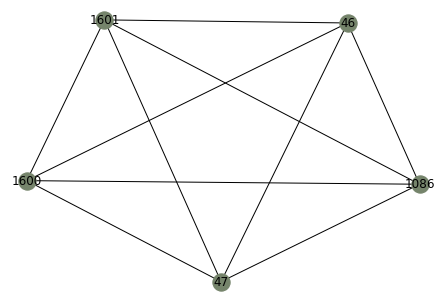

In [ ]:
# Represent Stable Community

import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
  
g = nx.Graph()

# [46, 1086, 1600, 1601, 47]\n 
# [2257, 2530, 2531, 2551, 2553]\n
g.add_node(46)
g.add_node(1086)
g.add_node(1600)
g.add_node(1601)
g.add_node(47)

g.add_edge(46, 1086)
g.add_edge(46, 1600)
g.add_edge(46, 1601)
g.add_edge(46, 47)

g.add_edge(1086, 46)
g.add_edge(1086, 1600)
g.add_edge(1086, 1601)
g.add_edge(1086, 47)

g.add_edge(1601, 46)
g.add_edge(1601, 1086)
g.add_edge(1601, 1600)
g.add_edge(1601, 47)

g.add_edge(1600, 46)
g.add_edge(1600, 1086)
g.add_edge(1600, 1601)
g.add_edge(1600, 47)

# drawing in spring layout
nx.draw_spring(g, with_labels = True, node_color="#75846b")
plt.savefig("stable_dc.png", transparent = True, dpi = 300)

# LITECOIN EXTRACTION - TEMPORAL COMMUNITY


In [ ]:
#####################
###### LITECOIN #####
#####################
#### EXTRACTION #####
#####################
#### COMM FORMAT ####
#####################

# import packages
import requests
import tabulate
import pandas as pd
import networkx as nx
import numpy as np
import datetime
 


# 2082258 - 2082265: 07/07/2021 
 
# range block
block_range = list(range(2082258, 2082365)) # replace as needed
 
r1 = 0
r2 = 10
size_block = range(r1, r2)

# transaction info
transaction_id = []
input_address = []
input_value = []
output_address = []
output_value = []
date = []
date_form = []
 
# range transaction
r3 = 0
 
for y in size_block:
 
  # transaction link
  link_block = 'https://chain.so/api/v2/get_block/LTC/' + str(block_range[y])
 
  response = requests.get(link_block)
 
  if response.status_code == 200:
      # everything went swimmingly                                                                                                                   
      # parse the response as JSON
      content = response.json()
      
      # transaction id
      txs = content['data']['txs']

      # range
      r4 = len(txs)
      size = range(r3, r4)
 
  for x in size:
 
    # transaction link
    link_txs = 'https://chain.so/api/v2/tx/LTC/' + str(txs[x])
 
    response = requests.get(link_txs) 
      
    if response.status_code == 200:
          # everything went swimmingly parse the response as JSON
          content = response.json()
 
          # transaction_id
          transaction_id.append(content['data']['txid'])
          
          # input leg
          for each in content['data']['inputs']:
            input_address.append(each['address'])
            input_value.append(each['value'])
 
          # output leg
          for each in content['data']['outputs']:
            output_address.append(each['address'])
            output_value.append(each['value'])
 
          # date
          date.append(content['data']['time'])
 
          largest = max(len(transaction_id), len(input_address), len(input_value), len(output_address), len(output_value))
          
    # filling for different len
    len_transaction_id = largest - len(transaction_id)
    len_input_address = largest - len(input_address)
    len_output_address = largest - len(output_address)
    len_date = largest - len(date)

    corr_transaction_id = [None]*len_transaction_id
    corr_input_address = [None]*len_input_address
    corr_output_address = [None]*len_output_address
    corr_date = [None]*len_date
 
    transaction_id.extend(corr_transaction_id)
    input_address.extend(corr_input_address)
    input_value.extend(corr_input_address)
    output_address.extend(corr_output_address)
    output_value.extend(corr_output_address)
    date.extend(corr_date)
    
# as data frame 
df_lc_cm_01 = pd.DataFrame({'transaction_id': transaction_id, 'from_leg': input_address, 'tt_value': input_value, 'to': output_address, 'amount': output_value, 'date': date})
 
 
#clean data
  # obmit nulldata & reindex
df_lc_cm = df_lc_cm_01[df_lc_cm_01.to != "nulldata"]
df_lc_cm.reset_index(drop=True, inplace=True)
 
 # fill NaN with previous data for all NaN, None
df_lc_cm.date = df_lc_cm.date.fillna(method = 'ffill')
df_lc_cm.from_leg = df_lc_cm.from_leg.fillna(method = 'ffill')
df_lc_cm.transaction_id = df_lc_cm.transaction_id.fillna(method = 'ffill')
df_lc_cm.tt_value = df_lc_cm.tt_value.fillna(method = 'ffill')
df_lc_cm = df_lc_cm.fillna(value=np.nan)


# rename columns to keep
df_lc_cm = df_lc_cm.rename(columns = {'from_leg': 'from_id'}, inplace = False)
df_lc_cm = df_lc_cm.rename(columns = {'to': 'to_id'}, inplace = False)
df_lc_cm = df_lc_cm.rename(columns = {'date': 'timestamps'}, inplace = False)

# drop unecessary columns
df_lc_cm = df_lc_cm.drop(columns = 'transaction_id')
df_lc_cm = df_lc_cm.drop(columns = 'tt_value')
df_lc_cm = df_lc_cm.drop(columns = 'amount')
df_lc_cm = df_lc_cm.dropna()


# dictionary for convertion to int

# to_id
from_id_no_dupes_lc = set(df_lc_cm.from_id) 
from_id_no_dupes_lc.update(set(df_lc_cm.to_id))
no_dupes_lc = list(from_id_no_dupes_lc)
k1 = 0 #range
k2 = len(no_dupes_lc) #range
key_lc = list(range(k1, k2)) # creates key id
df_lc_to = pd.DataFrame({'to_id': no_dupes_lc, 'factor_to': key_lc}) # as dataframe

# from_id
from_id_no_dupes_lc = set(df_lc_cm.from_id) 
from_id_no_dupes_lc.update(set(df_lc_cm.to_id))
no_dupes_lc = list(from_id_no_dupes_lc)
k1 = 0 #range
k2 = len(no_dupes_lc) #range
key_lc = list(range(k1, k2)) # creates key id
df_lc_from = pd.DataFrame({'from_id': no_dupes_lc, 'factor_to': key_lc}) # as dataframe

# merges dfs
f1_lc_df = pd.merge(df_lc_cm, df_lc_from, on = 'from_id', how ='left')
full_lc_df = pd.merge(f1_lc_df, df_lc_to, on = 'to_id', how ='left')

# drop columns and rename to keep
full_lc_df = full_lc_df.drop(columns= 'from_id')
full_lc_df = full_lc_df.drop(columns= 'to_id')
full_lc_df = full_lc_df.rename(columns = {'factor_to_x': 'from_id'}, inplace = False)
full_lc_df = full_lc_df.rename(columns = {'factor_to_y': 'to_id'}, inplace = False)

# factorise timestamps
full_lc_df['timestamps'] = pd.factorize(full_lc_df.timestamps)[0]

# as int
full_lc_df = full_lc_df.astype(int)

# re order
full_lc_df = full_lc_df[['from_id','to_id','timestamps']]

# save
full_lc_df.to_csv("full_lc_df.csv", sep='\t', header=False)  
full_lc_df


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,from_id,to_id,timestamps
0,251,265,0
1,4,351,0
2,4,4,0
3,95,292,0
4,95,350,0
...,...,...,...
337,254,205,9
338,254,254,9
339,59,115,9
340,59,59,9


# LITECOIN STABLE COMMUNITY

In [ ]:
#####################
###### LITECOIN #####
#####################
#### STABLE COM #####
#####################

# mounts drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# https://github.com/VeryLargeGraph/TSCAN
# runs run.py - TSCAN
!python3 "/content/drive/My Drive/Colab Notebooks/run.py"

Dataset name(str): full_lc_df.csv
Epsilon(float): 0.5
Tau(int): 1
Miu(int): 1
Type one number to chose the algorithm: [1]TSCANB; [2]TSACNS; [3]TSCANA. (int): 1
3018
2931
temporal edges:2931.0
Runing time of SCANB:0.947159
Cores output at: full_lc_df.csv.output-0.5-1-1_SCANB


In [ ]:
# prints stable communities - STATIC ONES
stable_lc_01 = pd.DataFrame(data=open('/content/full_lc_df_output_05_1_1_SCANB'))
stable_lc_01 

,0
0,"[362, 3064, 2724, 2725, 2726, 2727, 2728, 2729..."
1,"[3087, 2812, 2813, 2814, 2815, 2816, 2817, 271..."
2,"[2257, 2530, 2531, 2551, 2553]\n"
3,"[134, 3248, 2736, 2737, 2738, 1234, 1235, 133]\n"
4,"[2970, 2708, 2709, 2710, 2711]\n"
...,...
93,"[2857, 3237]\n"
94,"[2889, 3281]\n"
95,[2923]\n
96,[2924]\n


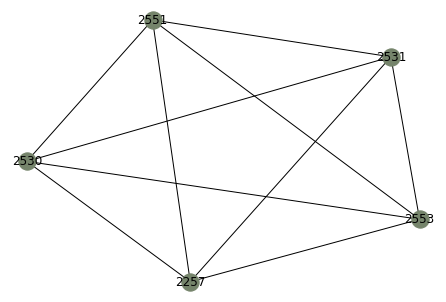

In [ ]:
# Represent Stable Community

import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
  
g = nx.Graph()
  
# [2257, 2530, 2531, 2551, 2553]\n
g.add_node(2257)
g.add_node(2530)
g.add_node(2531)
g.add_node(2551)
g.add_node(2553)

g.add_edge(2257, 2530)
g.add_edge(2257, 2531)
g.add_edge(2257, 2551)
g.add_edge(2257, 2553)

g.add_edge(2530, 2257)
g.add_edge(2530, 2531)
g.add_edge(2530, 2551)
g.add_edge(2530, 2553)

g.add_edge(2531, 2257)
g.add_edge(2531, 2530)
g.add_edge(2531, 2551)
g.add_edge(2531, 2553)

g.add_edge(2551, 2257)
g.add_edge(2551, 2530)
g.add_edge(2551, 2531)
g.add_edge(2551, 2553)

# drawing in spring layout
nx.draw_spring(g, with_labels = True, node_color="#75846b")
plt.savefig("stable_lc.png", transparent = True, dpi = 300)

# LITECOIN TEMPORAL LOUVAIN

In [ ]:
#####################
###### LITECOIN #####
#####################
#### TEMP MEAS ######
#####################

# imports teneto
!pip install teneto
import teneto
from teneto import TemporalNetwork

# define tnet
df_lc_tnet = full_lc_df

# rename columns to keep
df_lc_tnet = df_lc_tnet.rename(columns = {'from_id': 'i'}, inplace = False)
df_lc_tnet = df_lc_tnet.rename(columns = {'to_id': 'j'}, inplace = False)
df_lc_tnet = df_lc_tnet.rename(columns = {'timestamps': 't'}, inplace = False)

tnet_lc = TemporalNetwork(from_df=df_lc_tnet)
tnet_lc.network

# temporal louvain
temporal_louv_lc = teneto.communitydetection.temporal_louvain(tnet_lc)
  # IndexError: index 408424201934 is out of bounds for axis 0 with size 1006740

# as dataframe
temp_louv_lc = pd.DataFrame(temporal_louv_lc)
temp_louv_lc.to_csv("temp_louv_lc.csv")
temp_louv_lc

0


/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['i'] = self.network['i'].astype(int)
/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['j'] = self.network['j'].astype(int)


         i     j  weight
0        1    76       1
1      368   443       1
2      735   810       1
3     1102  1177       1
4     1469  1544       1
...    ...   ...     ...
6680  3298  3665       0
6681  3299  3666       0
6682  3300  3667       0
6683  3301  3668       0
6684  3302  3669       0

[6685 rows x 3 columns]
1


/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['i'] = self.network['i'].astype(int)
/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['j'] = self.network['j'].astype(int)


         i     j  weight
0        1    76       1
1      368   443       1
2      735   810       1
3     1102  1177       1
4     1469  1544       1
...    ...   ...     ...
9830  3298  3665       0
9831  3299  3666       0
9832  3300  3667       0
9833  3301  3668       0
9834  3302  3669       0

[9835 rows x 3 columns]
2


/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['i'] = self.network['i'].astype(int)
/usr/local/lib/python3.7/dist-packages/teneto/classes/network.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.network['j'] = self.network['j'].astype(int)


         i     j  weight
0        1    76       1
1      368   443       1
2      735   810       1
3     1102  1177       1
4     1469  1544       1
...    ...   ...     ...
9830  3298  3665       0
9831  3299  3666       0
9832  3300  3667       0
9833  3301  3668       0
9834  3302  3669       0

[9835 rows x 3 columns]


,0,1,2,3,4,5,6,7,8,9
0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0
1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
3,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
4,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...
362,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0
363,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0
364,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0
365,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0


In [ ]:
# score for stable community
temp_louv_lc['same_0'] = np.where( temp_louv_lc[0] == temp_louv_lc[1], 1, 0)
temp_louv_lc['same_1'] = np.where( temp_louv_lc[1] == temp_louv_lc[2], 1, 0)
temp_louv_lc['same_2'] = np.where( temp_louv_lc[2] == temp_louv_lc[3], 1, 0)
temp_louv_lc['same_3'] = np.where( temp_louv_lc[3] == temp_louv_lc[4], 1, 0)
temp_louv_lc['same_4'] = np.where( temp_louv_lc[4] == temp_louv_lc[5], 1, 0)
temp_louv_lc['same_5'] = np.where( temp_louv_lc[5] == temp_louv_lc[6], 1, 0)
temp_louv_lc['same_6'] = np.where( temp_louv_lc[6] == temp_louv_lc[7], 1, 0)
temp_louv_lc['same_7'] = np.where( temp_louv_lc[7] == temp_louv_lc[8], 1, 0)
temp_louv_lc['same_8'] = np.where( temp_louv_lc[8] == temp_louv_lc[9], 1, 0)
temp_louv_lc['score']=temp_louv_lc['same_0']+temp_louv_lc['same_1']+temp_louv_lc['same_2']+temp_louv_lc['same_3']+temp_louv_lc['same_4']+temp_louv_lc['same_5']+temp_louv_lc['same_6']+temp_louv_lc['same_7']+temp_louv_lc['same_8']
temp_louv_lc['stable'] = np.where( temp_louv_lc['score'] == 9, 1, 0)

# as int
temp_louv_lc = temp_louv_lc.astype(int)
summary_temp_louv_lc = temp_louv_lc

# summarizes df
summary_temp_louv_lc = summary_temp_louv_lc.drop(columns = 'same_0')
summary_temp_louv_lc = summary_temp_louv_lc.drop(columns = 'same_1')
summary_temp_louv_lc = summary_temp_louv_lc.drop(columns = 'same_2')
summary_temp_louv_lc = summary_temp_louv_lc.drop(columns = 'same_3')
summary_temp_louv_lc = summary_temp_louv_lc.drop(columns = 'same_4')
summary_temp_louv_lc = summary_temp_louv_lc.drop(columns = 'same_5')
summary_temp_louv_lc = summary_temp_louv_lc.drop(columns = 'same_6')
summary_temp_louv_lc = summary_temp_louv_lc.drop(columns = 'same_7')
summary_temp_louv_lc = summary_temp_louv_lc.drop(columns = 'same_8')
summary_temp_louv_lc = summary_temp_louv_lc.drop(columns = 'score')

# number of stable communities
summary_temp_louv_lc
summary_temp_louv_lc.max()

0         194
1         194
2         194
3         194
4         194
5         194
6         194
7         194
8         194
9         194
stable      1
dtype: int64

# NETWORK GRAPH - REPRESENTATION

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead
  from ipykernel import kernelapp as app
MovieWriter imagemagick unavailable; trying to use pillow instead.


TypeError: ignored

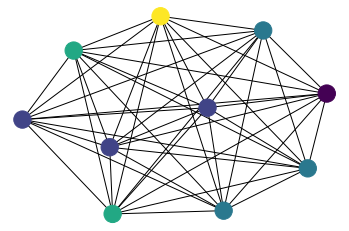

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation

# number of nodes
size = 10

# generate graph
G=nx.complete_graph(size)

# generating input frames here, since my data is too big
# its important that the frames go as input and is not generated
# on the fly
frame = np.random.random_integers(0, 5, (size, size)) # random ndarray between 0 and 5, length and number of frames = number of nodes in the graph

# draw the topology of the graph, what changes during animation
# is just the color
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G,pos)
edges = nx.draw_networkx_edges(G,pos)
plt.axis('off')

# pass frames to funcanimation via update function
# this is where I get stuck, since I cannot break
# out of the loop, neither can I read every array of
# the ndarray without looping over it explicitly
def update(i):
    # for i in range(len(frame)):
    # instead of giving frame as input, if I randomly generate it, then it works
    nc = frame[i] # np.random.randint(2, size=200)
    nodes.set_array(nc)
    return nodes,

# output animation; its important I save it
fig = plt.gcf()
ani = FuncAnimation(fig, update, interval=50, frames=range(size), blit=True)
ani.save('crap.gif', writer='imagemagick', savefig_kwargs={'facecolor':'white'}, fps=1)

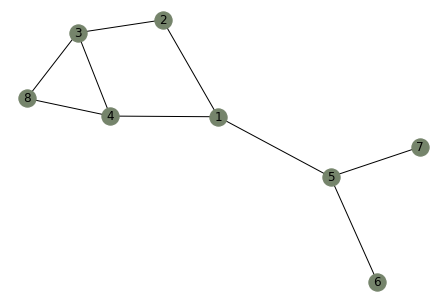

In [ ]:
# Network graph

import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
  
g = nx.Graph()
  
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 4)
g.add_edge(1, 4)
g.add_edge(1, 5)
g.add_edge(5, 6)
g.add_edge(5, 7)
g.add_edge(4, 8)
g.add_edge(3, 8)
  
# drawing in spring layout
nx.draw_spring(g, with_labels = True, node_color="#75846b")
plt.savefig("tg.png", transparent = True, dpi = 300)